<div class="alert alert-block alert-info">
<b> A simple KNN song recommender
</div>

***

Use a K-Nearest-Neighbors model to find the closest points in a dataset, e.g. in a song database.  

## Setup

In [1]:
import pandas as pd
import numpy as np

Import data, downloaded from __[here](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs)__:

In [2]:
path = "data/spotify_songs.csv"
data = pd.read_csv(path)

In [3]:
data.drop_duplicates(inplace = True)

In [4]:
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


## Data analysis

Let's analyze the data.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [7]:
data.track_id.describe()

count                      32833
unique                     28356
top       7BKLCZ1jbUBVqRi2FVlTVw
freq                          10
Name: track_id, dtype: object

Make sure each track appears only once:

In [8]:
data = data.drop_duplicates(subset='track_id', keep='first')
data = data.reset_index(drop=True)

In [9]:
data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
28352,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
28353,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
28354,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Save this version:

In [10]:
data.to_csv("data/data_cleaned")

Some visualisations:

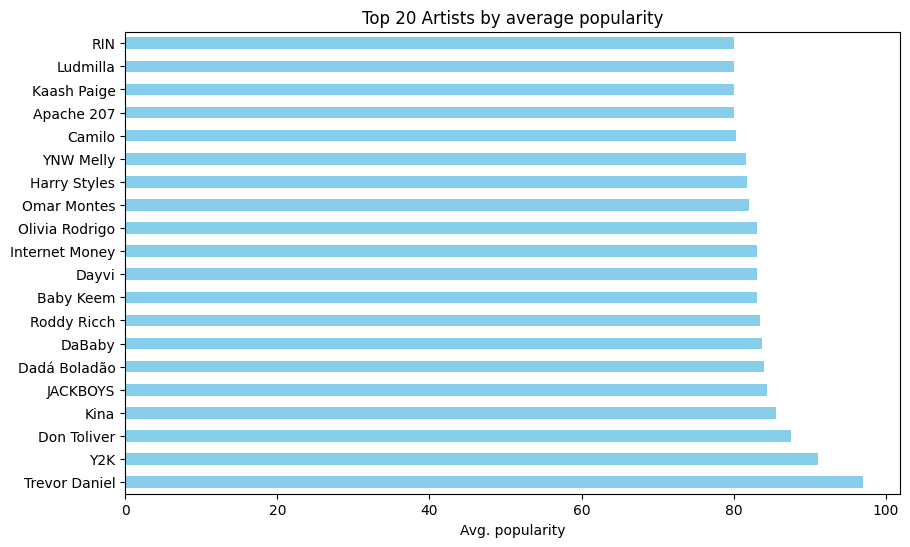

In [10]:
# Top 10 artists by avg. popularity of their songs
plt.figure(figsize=(10,6))
top_artists = data.groupby('track_artist')['track_popularity'].mean().nlargest(20)
top_artists.plot(kind='barh', color='skyblue')
plt.title('Top 20 Artists by average popularity')
plt.xlabel('Avg. popularity')
plt.ylabel('')
plt.show()

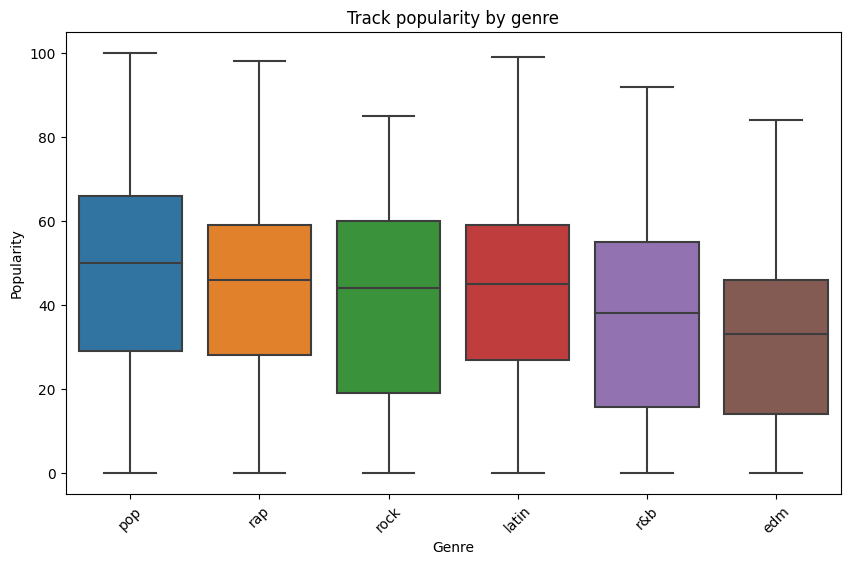

In [11]:
# Track popularity by genre
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='playlist_genre', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Track popularity by genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

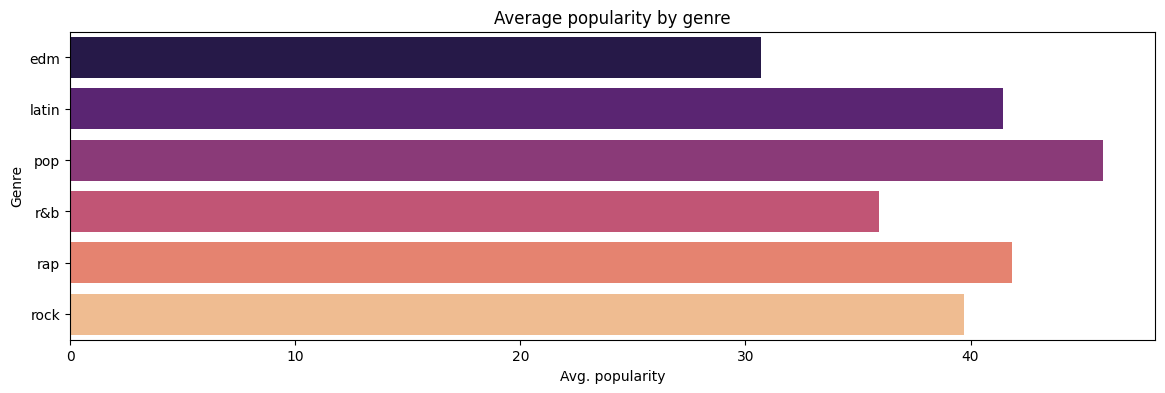

In [12]:
# Average popularity by genre
avg_pop_df = data.groupby('playlist_genre')['track_popularity'].mean().reset_index()
plt.figure(figsize=(14, 4))
sns.barplot(data=avg_pop_df, x='track_popularity', y='playlist_genre', palette='magma')
plt.title('Average popularity by genre')
plt.xlabel('Avg. popularity')
plt.ylabel('Genre')
plt.show()

How about Rock music?

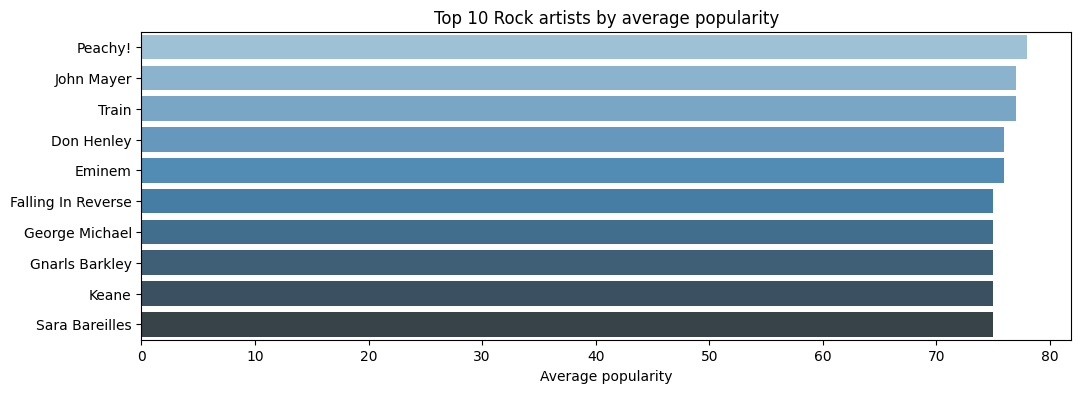

In [13]:
rock_df = data[data['playlist_genre'] == 'rock']

# average popularity per artist, ordered
top_rockers = rock_df.groupby('track_artist')['track_popularity'].mean().reset_index().nlargest(10, 'track_popularity')


plt.figure(figsize=(12, 4))
sns.barplot(data=top_rockers, x='track_popularity', y='track_artist', palette='Blues_d')
plt.title('Top 10 Rock artists by average popularity')
plt.xlabel('Average popularity')
plt.ylabel('')
plt.show()

... this seems a bit weird, so let's drop the column for genres and some other columns we won't need:

In [14]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [15]:
df = data[['track_name', 'track_artist', 'track_popularity',
        'track_album_name', 'track_album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']]

In [16]:
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28351,City Of Lights - Official Radio Edit,Lush & Simon,42,City Of Lights (Vocal Mix),2014-04-28,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
28352,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,Closer Remixed,2013-03-08,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
28353,Sweet Surrender - Radio Edit,Starkillers,14,Sweet Surrender (Radio Edit),2014-04-21,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
28354,Only For You - Maor Levi Remix,Mat Zo,15,Only For You (Remixes),2014-01-01,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


Look at numerical values:

In [17]:
df.select_dtypes(include='number').describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.00000,28356.000000
mean,39.329771,0.653372,0.698388,5.368000,-6.817696,0.565489,0.107954,0.177176,0.091117,0.190958,0.510387,120.95618,226575.967026
std,23.702376,0.145785,0.183503,3.613904,3.036243,0.495701,0.102556,0.222803,0.232548,0.155894,0.234340,26.95456,61078.450819
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309250,0.000000,0.041000,0.014375,0.000000,0.092600,0.329000,99.97200,187742.000000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.99300,216933.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.99900,254975.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.44000,517810.000000


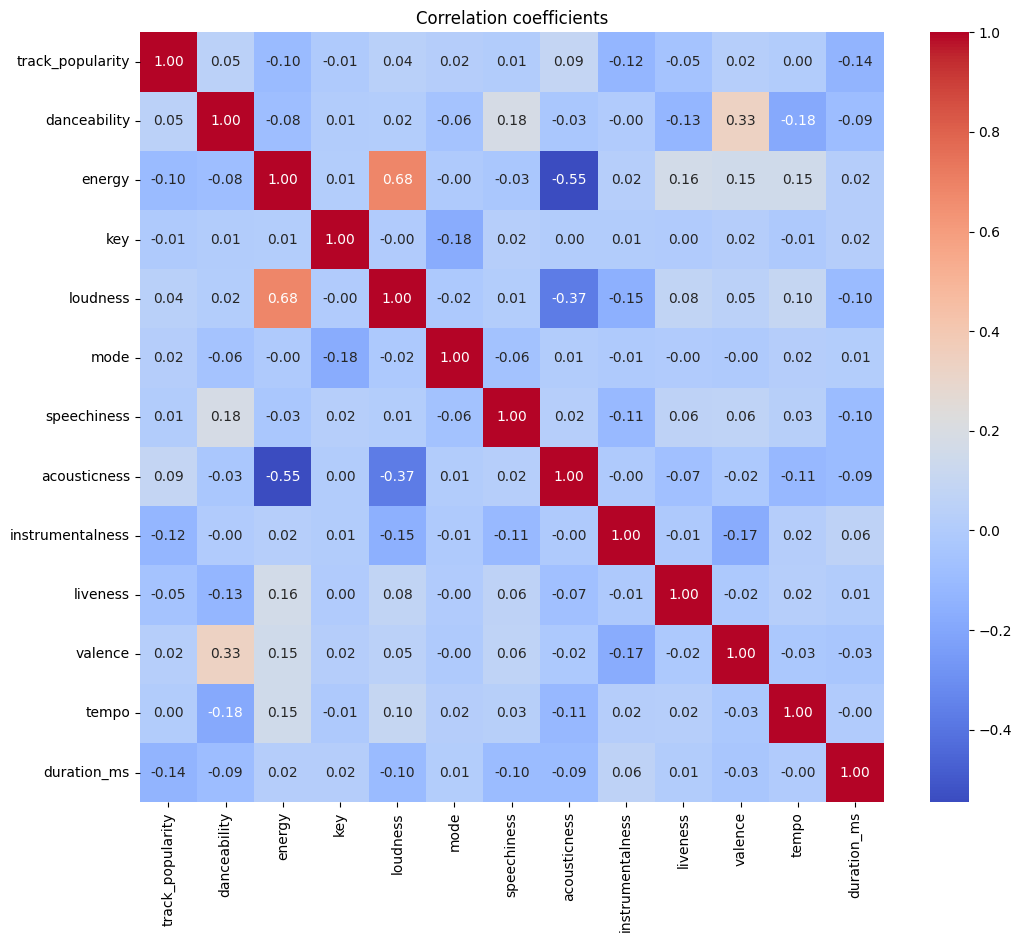

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation coefficients')
plt.show()

## Select a song

Query a song whose neighbors we want to find:

In [19]:
df[df.track_artist == "Tame Impala"]

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1075,Let It Happen,Tame Impala,75,Currents,2015-07-17,0.602,0.881,1,-5.875,0,0.0443,0.00462,0.026600,0.1110,0.577,125.012,467587
1110,Feels Like We Only Go Backwards,Tame Impala,75,Lonerism,2012-01-01,0.303,0.900,2,-2.352,0,0.0574,0.02770,0.635000,0.1100,0.491,149.508,192960
2032,The Less I Know The Better,Tame Impala,18,Currents,2015-07-17,0.640,0.755,1,-4.077,0,0.0287,0.01380,0.020800,0.1200,0.744,116.883,216319
2382,Let It Happen,Tame Impala,12,Currents,2015-07-17,0.602,0.874,1,-5.906,0,0.0428,0.00476,0.019200,0.1080,0.612,125.017,467585
11064,The Less I Know The Better,Tame Impala,85,Currents,2015-07-17,0.640,0.740,4,-4.083,1,0.0284,0.01150,0.006780,0.1670,0.785,116.879,216320
12513,Elephant,Tame Impala,12,Lonerism,2012-01-01,0.594,0.555,9,-6.689,0,0.0377,0.54100,0.151000,0.2860,0.520,123.069,211227
13349,Yes I'm Changing,Tame Impala,69,Currents,2015-07-17,0.373,0.609,0,-7.000,1,0.0316,0.10800,0.000427,0.0755,0.354,179.955,270680
20274,Borderline,Tame Impala,76,Borderline,2019-04-12,0.598,0.710,0,-6.839,0,0.0272,0.04760,0.000018,0.1000,0.726,97.976,274294


In [20]:
song = df.iloc[[12513]] 
song

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12513,Elephant,Tame Impala,12,Lonerism,2012-01-01,0.594,0.555,9,-6.689,0,0.0377,0.541,0.151,0.286,0.52,123.069,211227


## Prepare the model

Scale dataset, fit KNN.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [22]:
knn = KNeighborsRegressor(weights = "distance")
scaler = MinMaxScaler()

In [23]:
# prepare data 

X = df.drop(columns=['track_name','track_artist', 'track_album_name',
                      'track_album_release_date','duration_ms']) # don't use duration for "neigboring"
y = df['tempo'] # random choice, since we are only looking for neighbors

In [24]:
X_scaled = scaler.fit_transform(X)

In [25]:
knn.fit(X_scaled,y) 

KNeighborsRegressor(weights='distance')

##  Find neighbors

We use the knn to find songs that are close.

In [26]:
X_new = song.drop(columns=['track_name','track_artist', 'track_album_name','track_album_release_date','duration_ms'])
X_new_scaled = scaler.transform(X_new)

knn.kneighbors(X_new_scaled,n_neighbors=5)

(array([[0.        , 0.26929187, 0.27454504, 0.28306751, 0.28596842]]),
 array([[12513, 10659, 22960, 21546, 27051]]))

Write a function to list results:

In [27]:
def songs_like(song , n):
    '''
    Returns info of n songs that are closest to input song, orderd by popularity
    '''
    X_new = song.drop(columns=['track_name','track_artist', 'track_album_name','track_album_release_date','duration_ms'])
    X_new_scaled = scaler.transform(X_new)
    result = knn.kneighbors(X_new_scaled,n_neighbors=n+1)
    

    return df.iloc[list(result[1][0])[1:]].sort_values(by="danceability", ascending = False)

In [28]:
songs_like(song,4)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
10659,Light Morning,オメガトライブ,25,AQUA CITY,1983-09-21,0.717,0.563,9,-6.174,0,0.0270,0.433,0.000,0.255,0.581,122.533,264267
21546,I Don't Wanna,Aaliyah,0,Ultimate CD2,2003-02-12,0.706,0.522,9,-7.385,0,0.0352,0.546,0.000,0.276,0.684,130.034,256560
22960,Keep It Jazzy,Exact Change Project,26,Escape Capsule,2012-09-18,0.687,0.535,10,-10.489,0,0.1310,0.581,0.101,0.345,0.516,94.926,296694
27051,Holding on - Radio Edit,Ben Yoo Suk,8,Holding on (Radio Edit),2019-08-30,0.599,0.746,10,-10.698,0,0.0406,0.439,0.222,0.398,0.527,123.026,223500


In [29]:
songs_like(song,1)

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
10659,Light Morning,オメガトライブ,25,AQUA CITY,1983-09-21,0.717,0.563,9,-6.174,0,0.027,0.433,0.0,0.255,0.581,122.533,264267


## Song search

Use a function to query songs easily.

In [30]:
def search_song():
    '''
    Query song and artist name, number of neighbors, then use songs_like for recommendation
    '''
    track = input("Please enter song title: ")
    artist = input("Please enter artist name: ")
    nr = input("How many suggestions you'd like to have? ")
    
    # Check if 'track_name' and 'track_artist' contain the query
    track_check = df['track_name'].str.contains(track, case=False, na=False)
    artist_check = df['track_artist'].str.contains(artist, case=False, na=False)
    match_index = df.index[track_check & artist_check].tolist()
    
    # Return query result
    print("\n")
    if not match_index:
        print("Sorry, could not find this song :(")
    elif len(match_index) > 1:
        print("More than one result, please choose one from: \n", df.loc[match_index][["track_name","track_artist"]])
    else:
        n = int(nr)
        if n == 1:
            print(f"The closest song to {song.track_name.values[0]} by {song.track_artist.values[0]} is")
        else:
            print(f"The {n} closests songs to {song.track_name.values[0]} by {song.track_artist.values[0]} are")
        return(songs_like(df.loc[match_index],n))

In [31]:
search_song()

Please enter song title: 
Please enter artist name: 
How many suggestions you'd like to have? 


More than one result, please choose one from: 
                                               track_name      track_artist
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran
1                        Memories - Dillon Francis Remix          Maroon 5
2                        All the Time - Don Diablo Remix      Zara Larsson
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers
4                Someone You Loved - Future Humans Remix     Lewis Capaldi
...                                                  ...               ...
28351               City Of Lights - Official Radio Edit      Lush & Simon
28352                Closer - Sultan & Ned Shepard Remix    Tegan and Sara
28353                       Sweet Surrender - Radio Edit       Starkillers
28354                     Only For You - Maor Levi Remix            Mat Zo
28355                         

## Clustering 

We can use K-Means clustering to group songs together.

In [32]:
from sklearn.cluster import KMeans

Prepare the data:

In [33]:
scaler = MinMaxScaler()

X = df.drop(columns=['track_name','track_artist', 'track_album_name',
                      'track_album_release_date','duration_ms'])
X_scaled = scaler.fit_transform(X)

Use the elbow method to determine the "optimal" number of clusters.

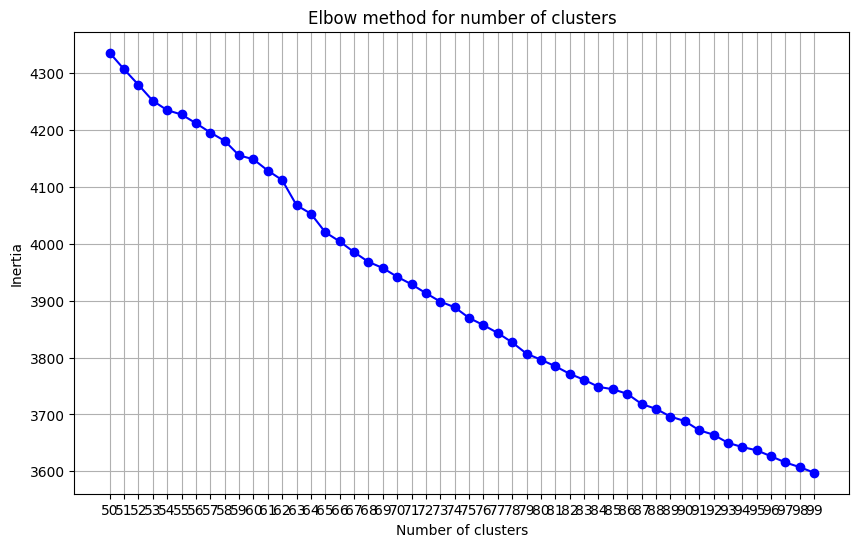

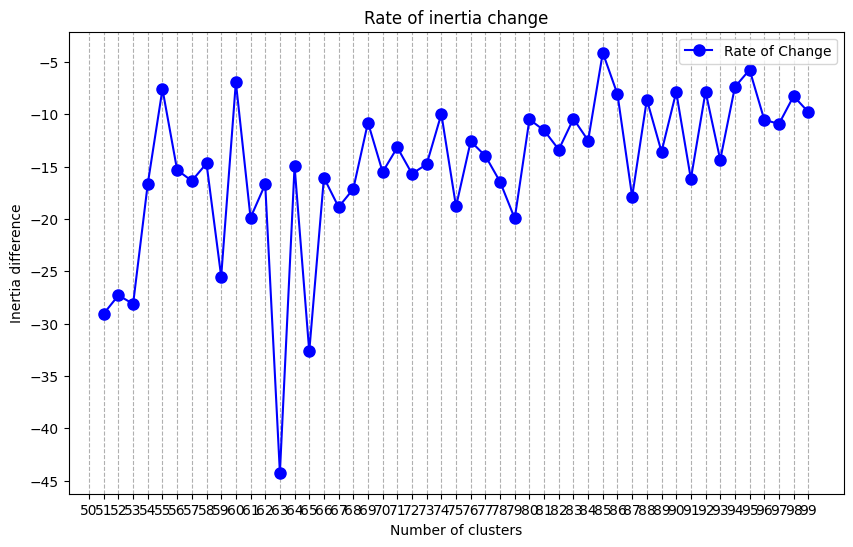

In [34]:
# Run through different values for the number of clusters

inertia = []
K = range(50, 100)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertias

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for number of clusters')
plt.xticks(K)
plt.grid(True)
plt.show()


# Calc. and plot the inertia difference to see the rate of change
inertia_diff = np.diff(inertia)

plt.figure(figsize=(10, 6))
plt.plot(K[1:], inertia_diff, 'bo-', markersize=8, label='Rate of Change')

plt.title('Rate of inertia change')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia difference')
plt.xticks(K)
plt.grid(True, which='both', axis='x', linestyle='--')
plt.legend()
plt.show()

Looks like $k=65$ is a good choice.

In [35]:
optimal_k = 65

In [36]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=65, random_state=0)

Each cluster has its own representative, the cluster's center:

In [37]:
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.drop(columns=['track_name','track_artist', 'track_album_name',
                      'track_album_release_date','duration_ms']).columns) 
cluster_centers_df.index.names = ["cluster_type"]

In [38]:
cluster_centers_df

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster_type,,,,,,,,,,,,
0,53.151724,0.603910,0.422254,1.827586,-9.865593,2.220446e-16,0.088066,0.567062,0.028914,0.133837,0.284884,113.729607
1,66.054264,0.676439,0.802078,1.007752,-5.388033,1.000000e+00,0.088334,0.082169,0.008425,0.192188,0.716662,125.790859
2,58.312871,0.710713,0.588655,5.095050,-7.122834,3.330669e-16,0.104006,0.107658,0.013576,0.152343,0.327021,118.448780
3,27.693267,0.622042,0.813536,7.596010,-6.723571,1.000000e+00,0.074298,0.036799,0.761636,0.223380,0.221992,126.978965
4,44.641379,0.491455,0.280340,1.993103,-11.919297,1.000000e+00,0.055442,0.816283,0.020027,0.158238,0.286175,119.771086
...,...,...,...,...,...,...,...,...,...,...,...,...
60,7.707809,0.564088,0.838302,9.549118,-5.141237,-3.330669e-16,0.111622,0.044164,0.033321,0.221460,0.324944,126.219615
61,9.356275,0.631753,0.479534,3.210526,-9.394753,2.220446e-16,0.115308,0.519798,0.027593,0.167315,0.435533,112.349903
62,10.899054,0.560300,0.797181,7.337539,-5.627120,1.000000e+00,0.095678,0.041636,0.040045,0.190162,0.296382,127.425856


What's the category of our chosen song?

In [39]:
song

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
12513,Elephant,Tame Impala,12,Lonerism,2012-01-01,0.594,0.555,9,-6.689,0,0.0377,0.541,0.151,0.286,0.52,123.069,211227


In [40]:
x=song.drop(columns=['track_name','track_artist', 'track_album_name',
                      'track_album_release_date','duration_ms'])
x_scaled = scaler.transform(x)

In [41]:
kmeans.predict(x_scaled)

array([27], dtype=int32)

What about its 4 closest songs?

In [42]:
x_nbors=songs_like(song,4).drop(columns=['track_name','track_artist', 'track_album_name',
                      'track_album_release_date','duration_ms'])
x_nbors_scaled = scaler.transform(x_nbors)

kmeans.predict(x_nbors_scaled)

array([27, 27, 27, 27], dtype=int32)